In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import tkinter
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedKFold
from statistics import mean
from statistics import stdev as std
import statsmodels.formula.api as sm
pd.set_option("display.max_columns", None)
import statsmodels.api as sm
import matplotlib
import warnings
import statistics
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
%matplotlib inline

def merge_fix_cols(df_company,df_product,uniqueID):## merge 2 dataframes and remove the duplicate ## 

    df_merged = pd.merge(df_company,
                         df_product,
                         how='left',on=uniqueID)    
    for col in df_merged:
        if col.endswith('_x'):
            df_merged.rename(columns = lambda col:col.rstrip('_x'),inplace=True)
        elif col.endswith('_y'):
            to_drop = [col for col in df_merged if col.endswith('_y')]
            df_merged.drop(to_drop,axis=1,inplace=True)
        else:
            pass
    return df_merged

def dfmaker (x):
    y = x.items()
    y = list(y)
    df = pd. DataFrame(y) 
    return df

In [2]:
dataset = pd.read_csv("dataset.csv") ## read the csv file ## 
dataset

,Height,Salary,Purchased
0,187,20123,1
1,161,13624,0
2,167,16319,0
3,177,24251,1
4,190,57048,1
...,...,...,...
996,184,43717,1
997,191,36498,1
998,157,21908,0
999,183,35948,1


percentage of no Purchased is 39.06093906093906
percentage of Purchased 60.93906093906094


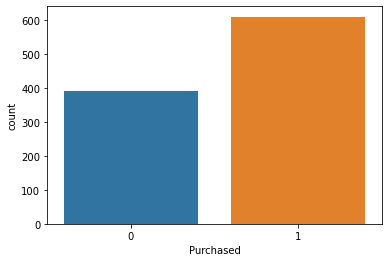

In [3]:
sns.countplot(dataset['Purchased'], label = "Count")
count_no_sub = len(dataset[dataset['Purchased']==0])
count_sub = len(dataset[dataset['Purchased']==1])
pct_of_no_sub =count_no_sub/(count_no_sub+count_sub)
print("percentage of no Purchased is",
pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Purchased", pct_of_sub*100)


<AxesSubplot:>

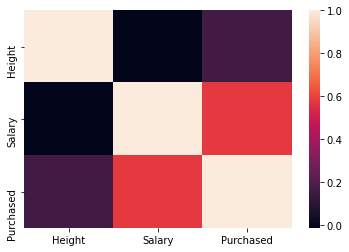

In [4]:
dfn_corr = dataset.corr()## show the corr matrix ##
sns.heatmap(dfn_corr)

In [5]:
#scaler = StandardScaler()
y = dataset.iloc[:,2:3].values ## take the y postive
x=dataset.iloc[:,0:2].values




,name,avg,std
0,1- Neighbors,0.925000,0.015000
1,2- Neighbors,0.923000,0.015000
2,3- Neighbors,0.924000,0.014000
3,4- Neighbors,0.928000,0.014000
4,5- Neighbors,0.927000,0.014000
5,6- Neighbors,0.928000,0.015000
6,7- Neighbors,0.927000,0.015000
7,8- Neighbors,0.924000,0.015000
8,9- Neighbors,0.926000,0.015000
9,10- Neighbors,0.923000,0.016000


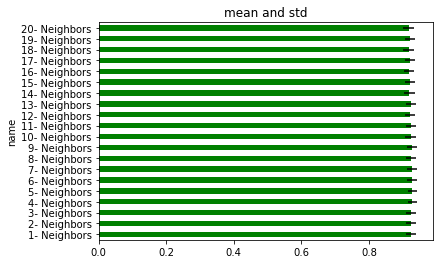

In [6]:
#knn#
avg_scores_f1 = {} ## dict for  f1 mean $
std_scores_f1 = {} ## dict for f1 std  $
f1_scores=[]

for i in range (1,21):
    knn = KNeighborsClassifier(n_neighbors=i,metric ="euclidean")
    f1_scores=[]
    for j in range (0,1001):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state = j)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform (X_test)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        score = f1_score(y_pred, y_test)
        f1_scores.append(score)
    avg_scores_f1[str(i)+"- Neighbors"]=mean(f1_scores)
    std_scores_f1[str(i)+"- Neighbors"]=std(f1_scores)
        
avg_sc=dfmaker(avg_scores_f1)
std_sc=dfmaker(std_scores_f1)
avg_d=avg_sc.rename(columns = {avg_sc.columns[0]:"name",avg_sc.columns[1]:"avg"})## rename to use apply#
std_d=std_sc.rename(columns = {std_sc.columns[0]:"name",std_sc.columns[1]:"std"})## rename to use apply#
df=merge_fix_cols(avg_d,std_d,"name")
df.plot(x ='name',kind = "barh", y = "avg", legend = False,xerr = "std", title = "mean and std", color='green')
df=df.round(decimals = 3)

df.style.highlight_max(color = 'lightgreen',subset=["avg"], axis = 0).highlight_min(color = 'lightgreen',subset=["std"], axis = 0)


  feature       VIF
0  Height  6.421313
1  Salary  6.421313


Text(0.5, 1.0, 'Log Odds Linear Height')

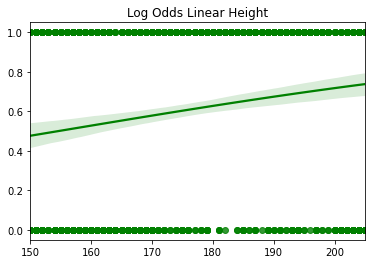

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression


y = dataset.iloc[:,2:3].values ## take the y postive
x=dataset.iloc[:,0:2]
x

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)


## high vlf so remove the Height   ##

y = dataset.iloc[:,2:3].values ## take the y postive
x=dataset.iloc[:,0:1].values
sns.regplot(x= x, y= y, logistic= True,color = 'green').set_title("Log Odds Linear Height")



Text(0.5, 1.0, 'Log Odds Linear Salary')

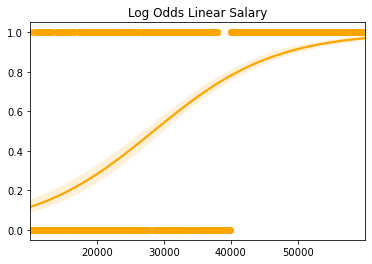

In [8]:
x=dataset.iloc[:,1:2].values
sns.regplot(x= x, y= y, logistic= True,color = 'orange').set_title("Log Odds Linear Salary")

In [9]:
x=dataset.iloc[:,1:2].values ## the only feature is salary##

In [10]:
#logistic regression#
## dont need to use SMOTE beacuse the data is balanced ## 
f1_scores=[]

for j in range (0,1001):
    
    logreg = LogisticRegression()
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state = j)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform (X_test)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    score =float(f1_score(y_pred, y_test))
    f1_scores.append((score))


avg_log=float(mean(f1_scores))
std_log=(std(f1_scores))
print("the avg is ",avg_log)
print("the std is ",std_log)

the avg is  0.7824864899348902
the std is  0.02225215931709485


In [11]:
##go back to the original data ## 

y = dataset.iloc[:,2:3].values ## take the y postive
x=dataset.iloc[:,0:2].values

In [12]:
#svc linear#
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
f1_scores=[]
for j in range (0,1001):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state = j)
    clf =LinearSVC()
    sc =StandardScaler() 
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform (X_test)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score =float(f1_score(y_pred, y_test))
    f1_scores.append((score))


avg_SVC=float(mean(f1_scores))
std_SVC=(std(f1_scores))
print("the avg is ",avg_SVC)
print("the std is ",std_SVC)

the avg is  0.814975719699746
the std is  0.02108274477477073


,name,avg,std
0,2- dgree,0.751365,0.019730
1,3- dgree,0.841320,0.019347
2,4- dgree,0.765646,0.021232
3,5- dgree,0.819369,0.019142


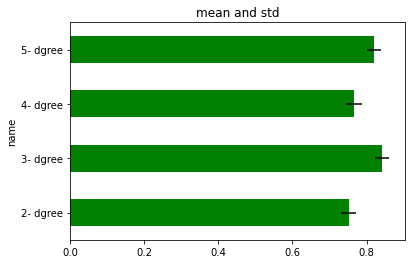

In [13]:
#svc poly regression#
avg_scores_f1 = {} ## dict for  f1 mean $
std_scores_f1 = {} ## dict for f1 std  $
f1_scores=[]
from sklearn.svm import SVC
for i in range (2,6):
    clf =SVC(kernel='poly',degree=i)
    f1_scores=[]
    for j in range (0,1001):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state = j)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform (X_test)

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = f1_score(y_pred, y_test)
        f1_scores.append(score)
    avg_scores_f1[str(i)+"- dgree"]=mean(f1_scores)
    std_scores_f1[str(i)+"- dgree"]=std(f1_scores)
        
avg_sc=dfmaker(avg_scores_f1)
std_sc=dfmaker(std_scores_f1)
avg_d=avg_sc.rename(columns = {avg_sc.columns[0]:"name",avg_sc.columns[1]:"avg"})## rename to use apply#
std_d=std_sc.rename(columns = {std_sc.columns[0]:"name",std_sc.columns[1]:"std"})## rename to use apply#
df_poly=merge_fix_cols(avg_d,std_d,"name")
df_poly.plot(x ='name',kind = "barh", y = "avg", legend = False,xerr = "std", title = "mean and std", color='green')
df_poly.round(decimals = 4)
df_poly.style.highlight_max(color = 'lightgreen',subset=["avg"], axis = 0).highlight_min(color = 'lightgreen',subset=["std"], axis = 0)


In [14]:
#svc gaussian #
avg_scores_f1 = {} ## dict for  f1 mean $
std_scores_f1 = {} ## dict for f1 std  $
f1_scores=[]
from sklearn.svm import SVC
for i in (0.2,0.5,1.2,1.8,3):
    clf =SVC(kernel="rbf", C =i)
    f1_scores=[]
    for j in range (0,1001):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state = j)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform (X_test)

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = f1_score(y_pred, y_test)
        f1_scores.append(score)
    avg_scores_f1[str(i)+"- C"]=mean(f1_scores)
    std_scores_f1[str(i)+"- C"]=std(f1_scores)
        


,name,avg,std
0,0.2- C,0.889030,0.017762
1,0.5- C,0.902821,0.017292
2,1.2- C,0.911217,0.016023
3,1.8- C,0.913864,0.015793
4,3- C,0.918061,0.015432


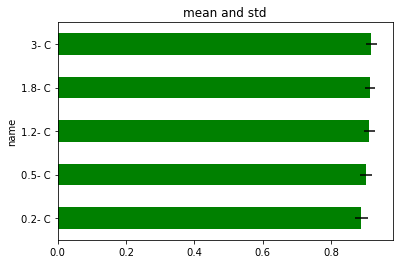

In [15]:
avg_a=dfmaker(avg_scores_f1)
std_a=dfmaker(std_scores_f1)
avg_d=avg_a.rename(columns = {avg_a.columns[0]:"name",avg_a.columns[1]:"avg"})## rename to use apply#
std_d=std_a.rename(columns = {std_a.columns[0]:"name",std_a.columns[1]:"std"})## rename to use apply#
df_gu=merge_fix_cols(avg_d,std_d,"name")
df_gu.plot(x ='name',kind = "barh", y = "avg", legend = False,xerr = "std", title = "mean and std", color='green')
df_gu.round(decimals = 3)
df_gu.style.highlight_max(color = 'lightgreen',subset=["avg"], axis = 0).highlight_min(color = 'lightgreen',subset=["std"], axis = 0)

